# Natural Language Processing

### Document: Collection of paragraphs, sentences, and words. In a database this will be a record

### Corpus [Corpora]: Collection of similar documents. In a database this is a table

### Natural Language Toolkit (NLTK)
* text processing and analytical capabilities
* ML support

### NLTK Corpus Reader

### Text Tokenization: Process of brekaing a stream of textual content into words, terms, symbols, etc

### Cleansing Text
* Make sure same format and standardized
* remove punctuation marks
* remove abbreviations
* case conversion (uppercase/lowercase)
* remove hashtags, urls

### Remove stop words: words that carry no meaning by themselves
* not required for analysis

### Stemming: a stem is the base of a word. e.g. combi is the stem for combine, combined, combining
* reduce total words in the corpus

### Lemmatization: produces a proper root word that belongs to the language

### Parts of Speech (POS) Tagging

### N-grams: Sequence of n items in a sample text

### Build the TF-IDF Matrix

### Word Cloud

### Sentiment Analysis

### Clustering
* Find optimal cluster size

### Classification

### Build a ML Model
* Run predictions
* Predictive Text

### Build a ngrams DB

### Recommend the next next

In [1]:
import os
import nltk
import matplotlib.pyplot as plt
# nltk.download('punkt')

In [2]:
# read file
with open(os.getcwd() + '/Course.txt', 'r') as fh:
    filedata = fh.read()

# print first 200 characters
print('Data from file: ', filedata[0:200])

Data from file:  In order to construct data pipelines and networks that stream, process, and store data, data engineers and data-science DevOps specialists must understand how to combine multiple big data technologies


In [3]:
# read text using the Corpus Reader
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

# read the file into a corpus
corpus = PlaintextCorpusReader(os.getcwd(), 'Course.txt')

# print the content of the corpus
print(corpus.raw())

In order to construct data pipelines and networks that stream, process, and store data, data engineers and data-science DevOps specialists must understand how to combine multiple big data technologies. In this course, discover how to build big data pipelines around Apache Spark. Join your instructor as he takes you through how to make Apache Spark work with other big data technologies. He covers the basics of Apache Kafka Connect and how to integrate it with Spark for real-time streaming. In addition, he demonstrates how to use the various technologies to construct an end-to-end project that solves a real-world business problem.



In [4]:
# extract the file ids
print('Files in this corpus: ', corpus.fileids())

# extract the paragraphs from this corpus
paragraphs = corpus.paras()
print('Number of paragraphs:', len(paragraphs))

# extract the sentences from the corpus
sentences = corpus.sents()
print('Number of sentences:', len(sentences))
print('First sentence:', sentences[0])

# extract words
words = corpus.words()
print('Number of words:', len(words))
print('All words in the corpus:', words)

Files in this corpus:  ['Course.txt']
Number of paragraphs: 1
Number of sentences: 5
First sentence: ['In', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', ',', 'process', ',', 'and', 'store', 'data', ',', 'data', 'engineers', 'and', 'data', '-', 'science', 'DevOps', 'specialists', 'must', 'understand', 'how', 'to', 'combine', 'multiple', 'big', 'data', 'technologies', '.']
Number of words: 120
All words in the corpus: ['In', 'order', 'to', 'construct', 'data', 'pipelines', ...]


#### Analyze the corpus

In [5]:
# find the frequency distribution of the words
course_freq = nltk.FreqDist(corpus.words())

# print the most commonly used words
print('Top 10 words:', course_freq.most_common(10))

# find the distribution for a specific word
print('Distribution for Spark:', course_freq.get('Spark'))

Top 10 words: [('to', 8), ('data', 7), (',', 5), ('-', 5), ('how', 5), ('.', 5), ('and', 4), ('In', 3), ('big', 3), ('technologies', 3)]
Distribution for Spark: 3


In [6]:
# read the file into tokens
base_file = open(os.getcwd() + '/Course.txt', 'rt')
raw_text = base_file.read()
base_file.close()

In [7]:
# extract tokens
token_list = nltk.word_tokenize(raw_text)
print('Token list:', token_list[:20])
print('Total tokens:', len(token_list))

Token list: ['In', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', ',', 'process', ',', 'and', 'store', 'data', ',', 'data', 'engineers', 'and']
Total tokens: 110


#### Cleaning Text

In [8]:
# use the punkt library to extract tokens
token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
print('Token List after removing punctuation:', token_list2[0:20])
print('Total token after punctuation removal:', len(token_list2))

Token List after removing punctuation: ['In', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', 'process', 'and', 'store', 'data', 'data', 'engineers', 'and', 'data-science', 'DevOps', 'specialists']
Total token after punctuation removal: 100


In [9]:
# convert to lower case
token_list3 = [word.lower() for word in token_list2]
print('Token List after case conversion:', token_list3[0:20])
print('Total token after case conversion:', len(token_list3))

Token List after case conversion: ['in', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', 'process', 'and', 'store', 'data', 'data', 'engineers', 'and', 'data-science', 'devops', 'specialists']
Total token after case conversion: 100


#### Remove Stopwords

In [10]:
# download standard stopwordlist
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [11]:
token_list4 = list(filter(lambda token: token not in stopwords.words('english'), token_list3))
print('Token List after removing stopwords:', token_list4[0:20])
print('Total token after removing stopwords:', len(token_list4))

Token List after removing stopwords: ['order', 'construct', 'data', 'pipelines', 'networks', 'stream', 'process', 'store', 'data', 'data', 'engineers', 'data-science', 'devops', 'specialists', 'must', 'understand', 'combine', 'multiple', 'big', 'data']
Total token after removing stopwords: 61


#### Stemming

In [12]:
# use the PorterStemmer library for stemming
from nltk.stem import PorterStemmer

In [13]:
stemmer = PorterStemmer()

# now stem the data
token_list5 = [stemmer.stem(word) for word in token_list4]
print('Token list after stemming:')
print(token_list5[0:20])
print('Total tokens after stemming:', len(token_list5))

Token list after stemming:
['order', 'construct', 'data', 'pipelin', 'network', 'stream', 'process', 'store', 'data', 'data', 'engin', 'data-sci', 'devop', 'specialist', 'must', 'understand', 'combin', 'multipl', 'big', 'data']
Total tokens after stemming: 61


#### Lemmatization

In [14]:
# Use the wordnet library to map words to their lemmatized form
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

In [15]:
lemmatizer = WordNetLemmatizer()
token_list6 = [lemmatizer.lemmatize(word) for word in token_list4]
print('Token list after lemmatization:')
print(token_list6[0:20])
print('Total tokens after lemmatization:', len(token_list6))

Token list after lemmatization:
['order', 'construct', 'data', 'pipeline', 'network', 'stream', 'process', 'store', 'data', 'data', 'engineer', 'data-science', 'devops', 'specialist', 'must', 'understand', 'combine', 'multiple', 'big', 'data']
Total tokens after lemmatization: 61


#### N-grams

In [16]:
from nltk.util import ngrams
from collections import Counter

In [17]:
# find bigrams and print the most common 5
bigrams = ngrams(token_list6, 2)
print("Most common bigrams")
print(Counter(bigrams).most_common(5))

Most common bigrams
[(('big', 'data'), 3), (('data', 'pipeline'), 2), (('data', 'technology'), 2), (('apache', 'spark'), 2), (('order', 'construct'), 1)]


In [18]:
# find trigrams and print the most common 5
trigrams = ngrams(token_list6, 3)
print("Most common trigrams")
print(Counter(trigrams).most_common(5))

Most common trigrams
[(('big', 'data', 'technology'), 2), (('order', 'construct', 'data'), 1), (('construct', 'data', 'pipeline'), 1), (('data', 'pipeline', 'network'), 1), (('pipeline', 'network', 'stream'), 1)]


#### Parts of Speech Training

In [19]:
# download the tagger pacakge
# nltk.download('averaged_perceptron_tagger')

# tag and print the first 10 tokens
nltk.pos_tag(token_list4)[:10]

[('order', 'NN'),
 ('construct', 'NN'),
 ('data', 'NNS'),
 ('pipelines', 'NNS'),
 ('networks', 'NNS'),
 ('stream', 'VBP'),
 ('process', 'NN'),
 ('store', 'NN'),
 ('data', 'NNS'),
 ('data', 'NNS')]

#### WordCloud

In [20]:
# read the course descriptions
with open('Course.txt', 'r') as fh:
    filedata = fh.read()

# check contents
print('File contents: ', filedata[0:200])

File contents:  In order to construct data pipelines and networks that stream, process, and store data, data engineers and data-science DevOps specialists must understand how to combine multiple big data technologies


In [21]:
# create a stopword list
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# generate the word cloud data
wordcloud = WordCloud(stopwords = stopwords, max_words = 25, background_color = 'white').generate(filedata)

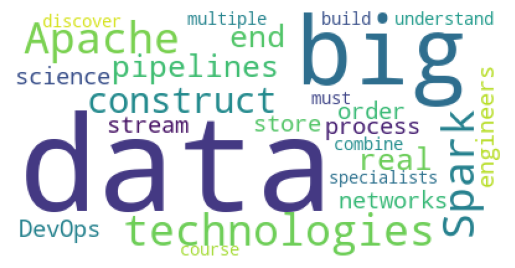

In [22]:
# display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

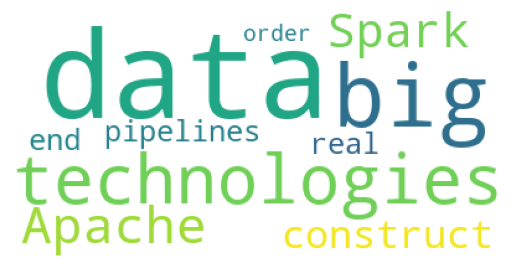

In [23]:
# enhance the word cloud
stopwords.update('many', 'using', 'want', 'value')

wordcloud = WordCloud(stopwords = stopwords, max_words = 10, background_color = 'white').generate(filedata)

# display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Sentimental Analysis

In [24]:
# Text Preprocessing
with open('Movie-Reviews.txt', 'r') as fh:
    reviews = fh.readlines()
print(reviews[:2])

['When your main character in a superhero movie is unwatchable, you already have a problem. In addition, Captain Marvel has no weaknesses, which kills the tension immediately.\n', 'Her performance was forced, uninspiring and flat! Not looking forward to the next movie with "her" in it....\n']


In [25]:
from textblob import TextBlob

In [26]:
print('{:40} : {:10} : {:10}'.format('Review', 'Polarity', 'Subjectivity'))

for review in reviews:
    sentiment = TextBlob(review)
    print('{:40} : {:01.2f}         : {:01.2f}'.format(review[:40], sentiment.polarity, sentiment.subjectivity))

Review                                   : Polarity   : Subjectivity
When your main character in a superhero  : 0.17         : 0.33
Her performance was forced, uninspiring  : -0.11         : 0.11
I couldn't believe how boring this movie : -0.51         : 0.72
Nothing beats a good marvel movie, and t : 0.70         : 0.60
This movie did for Marvel what Wonder Wo : 0.60         : 0.68
Captain Marvel just became my favorite s : 0.40         : 0.64
This is a very controversial Marvel film : 0.36         : 0.62
Unfortunately, despite carrying many ele : -0.14         : 0.48
It's worth watching just for the fact th : 0.30         : 0.10
It's great for a first time viewing. Wou : 0.38         : 0.51


### Visualizing the Sentiment Analysis

Final summarized counts:  [2, 6, 2]


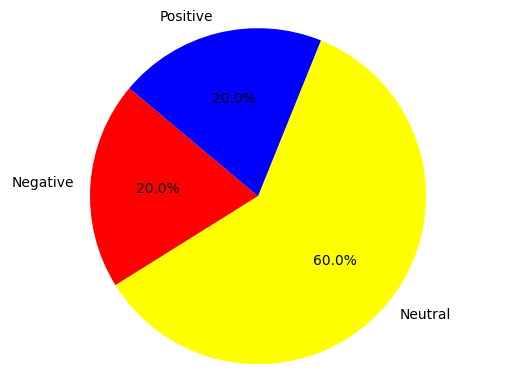

In [27]:
# categorize polarity into positive, neutral, or negative
labels = ['Negative', 'Neutral', 'Positive']

# initialize a count array
values = [0, 0, 0]

# categorize each review
for review in reviews:
    sentiment = TextBlob(review)

    # custom formula to convert polarity into numbers: 0, 1, 2
    polarity = round((sentiment.polarity + 1) * 3) % 3 # when modulo 3, you always get 0, 1, or 2

    # add to the count
    values[polarity] += 1

print('Final summarized counts: ', values)

colors = ['Red', 'Yellow', 'Blue']

# plot a pie chart
plt.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 140)
plt.axis('equal')
plt.show()

### Clustering

In [28]:
import pandas as pd

In [29]:
# load course hashtags
hashtags = pd.read_csv('Course-Hashtags.csv')
print('Sample Hashtag Data: ')
print(hashtags[:2])

Sample Hashtag Data: 
                            Course                             HashTags
0  Apache Spark Essential Training  BigData,DataScience,MachineLearning
1           Java Memory Management            Java,Advanced,Programming


In [30]:
# separate hastags and titles into lists
hash_list = hashtags['HashTags'].tolist()
title_list = hashtags['Course'].tolist()

# TF-IDF conversion of hastags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
hash_matrix = vectorizer.fit_transform(hash_list)
print('Feature Names Identified: ')
print(vectorizer.get_feature_names_out())

Feature Names Identified: 
['advanced' 'automation' 'bigdata' 'datascience' 'design' 'developer'
 'gcp' 'graphics' 'hadoop' 'ide' 'intermediate' 'java' 'jdbc' 'kubernetes'
 'machinelearning' 'patterns' 'programming' 'python' 'scala' 'scripting']


### Kmeans clustering

In [31]:
from sklearn.cluster import KMeans

# split the data into 3 clusters
kmeans = KMeans(n_clusters = 3, n_init=10).fit(hash_matrix)

# get cluster labels
clusters = kmeans.labels_

# print cluster label and courses
for group in set(clusters):
    print('\nGroup:', group)

    for i in hashtags.index:
        if (clusters[i] == group):
            print(title_list[i])


Group: 0
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science

Group: 1
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

Group: 2
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting


### Find Optimal Cluster Size

Sum of squared distances: [11.433022387031059, 9.082222515065638, 6.761066172191217, 5.6283212260073165, 4.688883377604406, 3.8776553357988535, 3.396998145258113, 2.8186260066230613, 2.522474066043382, 1.8650464167210747, 1.327122598510555, 0.8457910455266853, 0.40164181287464173, 8.881784197001252e-16]


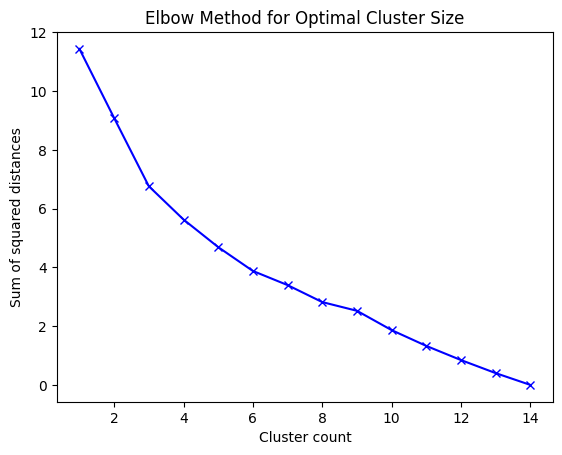

In [32]:
# find optimal cluster size by finding sum of square distances
sosd = []

# run clustering for different sizes
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(hash_matrix)
    sosd.append(km.inertia_)

print('Sum of squared distances:', sosd)

# plot sosd against number of clusters
plt.plot(K, sosd, 'bx-')
plt.xlabel('Cluster count')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal Cluster Size')

plt.show()

### Classification

In [40]:
with open('Course-Descriptions.txt', 'r') as fh:
    descriptions = fh.read().splitlines()
print('Sample Course descriptions:', descriptions[:2])

# set stop words
from nltk.corpus import stopwords

# setup wordnet for lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer

# custom tokenizer
def customtokenize(str):
    tokens = nltk.word_tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized

# generate TFIDF matrix
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
tfidf = vectorizer.fit_transform(descriptions)

print('Sample feature names identified: ', vectorizer.get_feature_names_out()[:25])
print('Size of TDIDF matrix:', tfidf.shape)

Sample Course descriptions: ['In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. ', 'PHP is the most popular server-side language used to build dynamic websites, and though it is not especially difficult to use, nonprogrammers often find it intimidating. ']
Sample feature names identified:  ["'ll" "'re" "'s" '(' ')' ',' '.' '?' 'actively' 'adopting' 'amazon'
 'analysis' 'analytics' 'application' 'applied' 'architect' 'architecture'
 'around' 'aspect' 'associate' 'aws' 'basic' 'become' 'begin' 'big']
Size of TDIDF matrix: (20, 238)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Build the Model

In [41]:
# load the pre-built classifications for training
with open('Course-Classification.txt', 'r') as fh:
    classifications = fh.read().splitlines()

# create labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classifications)
print("Classes found: ", le.classes_)

# convert classes into integers for use with ML
int_classes = le.transform(classifications)
print('Classes converted to integers: ', int_classes)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# splot as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(tfidf, int_classes, random_state=0)

classifier = MultinomialNB().fit(xtrain, ytrain)

Classes found:  ['Cloud-Computing' 'Data-Science' 'Programming']
Classes converted to integers:  [1 2 2 0 1 2 1 2 0 1 1 2 2 0 2 0 0 0 2 2]


#### Running Predictions

In [48]:
from sklearn import metrics

print('Testing with Test Data set')

# predict on test data
predictions = classifier.predict(xtest)

print('Confusion Matrix')
print(metrics.confusion_matrix(ytest, predictions))

print('\n Prediction Accuracy')
print(metrics.accuracy_score(ytest, predictions))




# predict on entire corpus data
predictions = classifier.predict(tfidf)

print('Confusion Matrix')
print(metrics.confusion_matrix(int_classes, predictions))

print('\n Prediction Accuracy')
print(metrics.accuracy_score(int_classes, predictions))

Testing with Test Data set
Confusion Matrix
[[1 0 0]
 [0 0 1]
 [1 0 2]]

 Prediction Accuracy
0.6
Confusion Matrix
[[6 0 0]
 [0 4 1]
 [1 0 8]]

 Prediction Accuracy
0.9


#### Predictive Text

In [49]:
# read course description file
base_file = open('Course-Descriptions.txt', 'rt')
raw_text = base_file.read()
base_file.close()

token_list = nltk.word_tokenize(raw_text)

token_list2 = [word.replace("'", "") for word in token_list]

# remove punctuation
token_list3 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list2))

# convert to lowercase
token_list4 = [word.lower() for word in token_list3]

print('Sample token list:', token_list4[:10])
print('Total Tokens: ', len(token_list4))

Sample token list: ['in', 'this', 'practical', 'hands-on', 'course', 'learn', 'how', 'to', 'do', 'data']
Total Tokens:  576


#### Build the ngrams DB (in memory, not hard-drive)